# Compare Summary Tree with True Simulated Tree

In [1]:
from Bio import Nexus, Phylo, SeqIO
from collections import defaultdict
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import re
from pathlib import Path

from itertools import combinations

from evaluation_helpers import *

## Calculate branch lenth and node height error for all trees

In [2]:
input_csv = "../scripts/successful_mcmc_runs.csv" 
overview_df = process_results(input_csv, present_pop_size = 2000, growth_rates = [0, 0.001, 0.002])
overview_df.head()
# only keep trees where both skyline and constcoal model ran
overview_df_ = overview_df.dropna()
overview_df_ = add_tree_information(overview_df_)
overview_df_.head()

,population_model,mutation_signal,tree_index,sim_tree_path,present_pop_size,growth_rate,log_path_constcoal,log_path_skyline,tree_path_constcoal,tree_path_skyline,skyline_means,skyline_times,coalescent_mean
0,expgrowth_fast,high,0,/Users/mariebecker/Documents/Uni/ETH/RotationS...,2000,0.002,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,"[1951.3942892726484, 1149.0680481003405, 1704....","[1.8023924367337258, 2.8553478496705793, 5.293...",1710.872499
1,expgrowth_fast,high,1,/Users/mariebecker/Documents/Uni/ETH/RotationS...,2000,0.002,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,"[2195.7443013891184, 2276.5029658333433, 2299....","[2.0457589295967864, 4.764664902355776, 7.8819...",1939.366430
2,expgrowth_fast,high,2,/Users/mariebecker/Documents/Uni/ETH/RotationS...,2000,0.002,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,"[1920.9790953702218, 1271.0700522226946, 1958....","[1.924766352503525, 2.917556396694067, 6.32949...",1885.024770
3,expgrowth_fast,high,3,/Users/mariebecker/Documents/Uni/ETH/RotationS...,2000,0.002,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,"[2148.504874426889, 1497.9425407533827, 1620.8...","[1.9803686778427618, 3.656818205781292, 5.5356...",1860.562984
4,expgrowth_fast,high,4,/Users/mariebecker/Documents/Uni/ETH/RotationS...,2000,0.002,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,/Users/mariebecker/Documents/Uni/ETH/RotationS...,"[1953.4474028920622, 2081.4437204744463, 2195....","[1.7185173137743277, 4.0100807028806, 7.322278...",1765.282609


In [3]:
tree_metrics_combined = tree_metrics_all_trees(overview_df_)
tree_metrics_combined = add_population_size_errors(tree_metrics_combined, overview_df_)
tree_metrics_combined.head()

NameError: name 'add_population_size_errors' is not defined

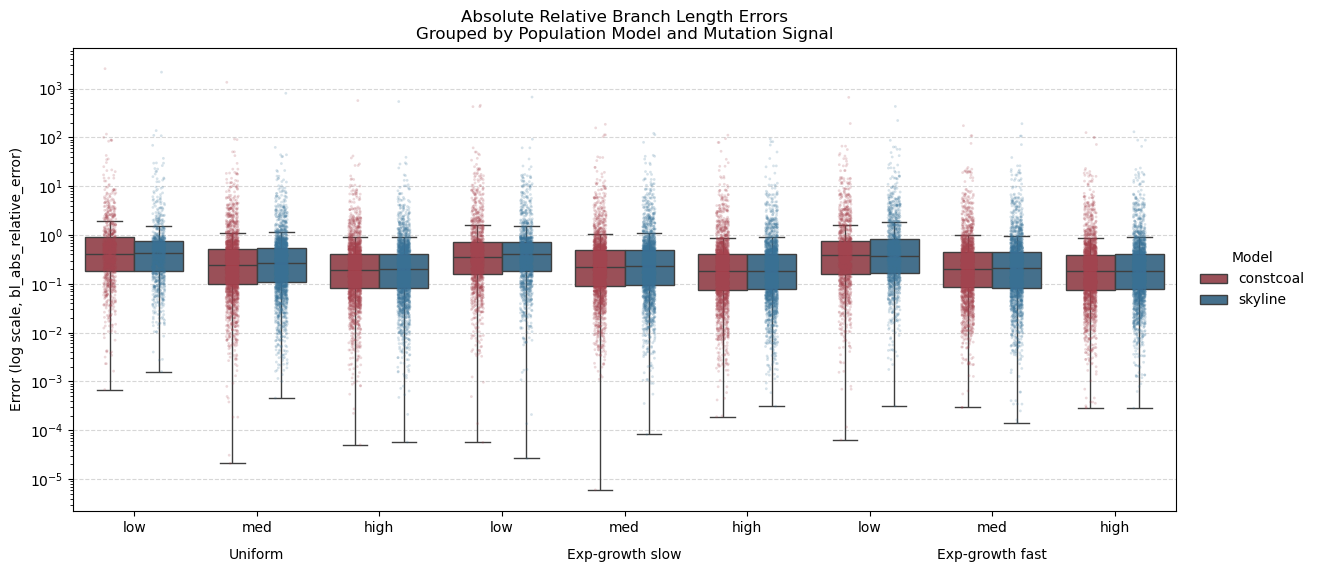

In [ ]:
boxplot_branch_length_errors(tree_metrics_combined, metric="bl_abs_relative_error", title="Absolute Relative Branch Length Errors\nGrouped by Population Model and Mutation Signal")

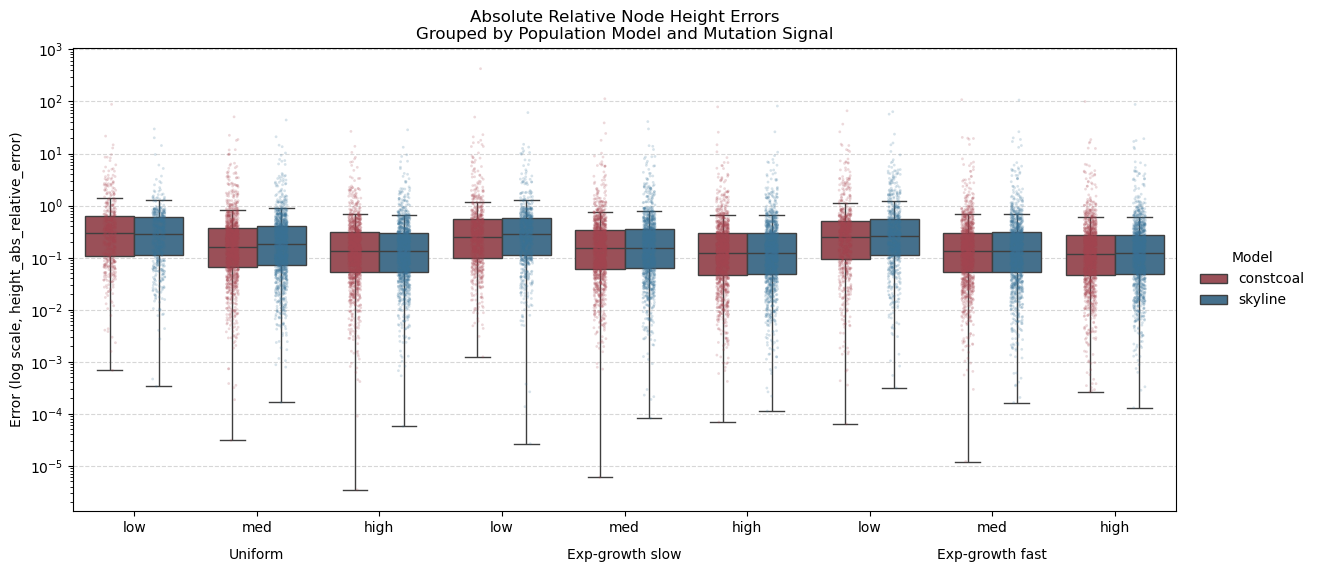

In [ ]:
boxplot_branch_length_errors(tree_metrics_combined, metric="height_abs_relative_error", title="Absolute Relative Node Height Errors\nGrouped by Population Model and Mutation Signal")

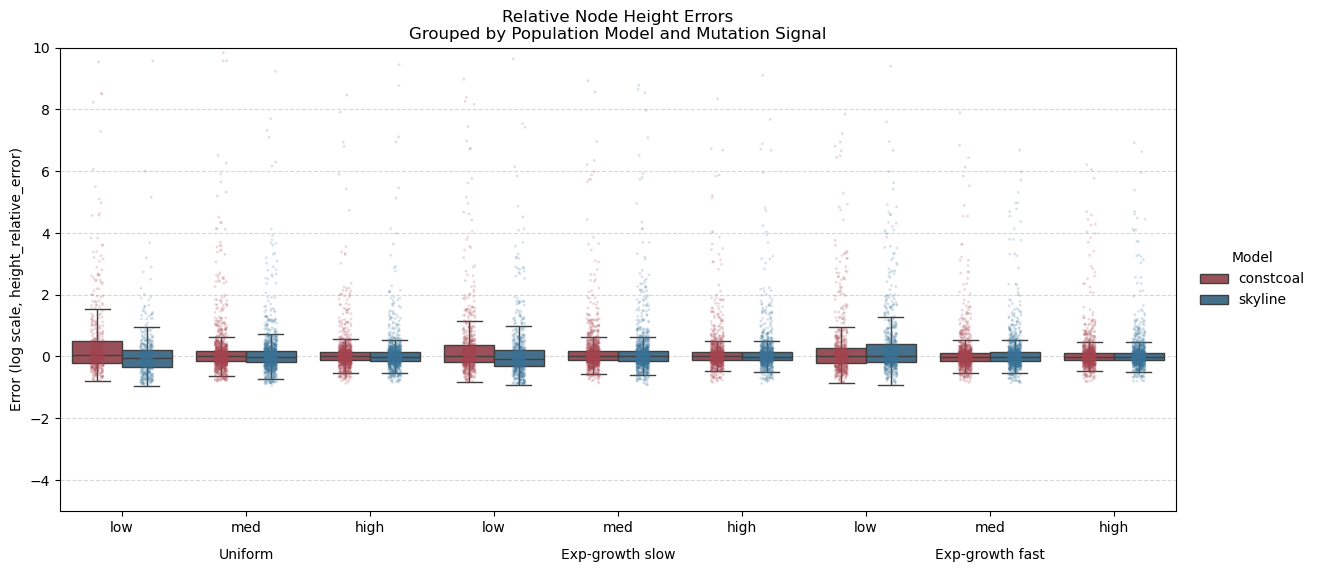

In [ ]:
boxplot_branch_length_errors(tree_metrics_combined, metric="height_relative_error", title="Relative Node Height Errors\nGrouped by Population Model and Mutation Signal", logscale = False)

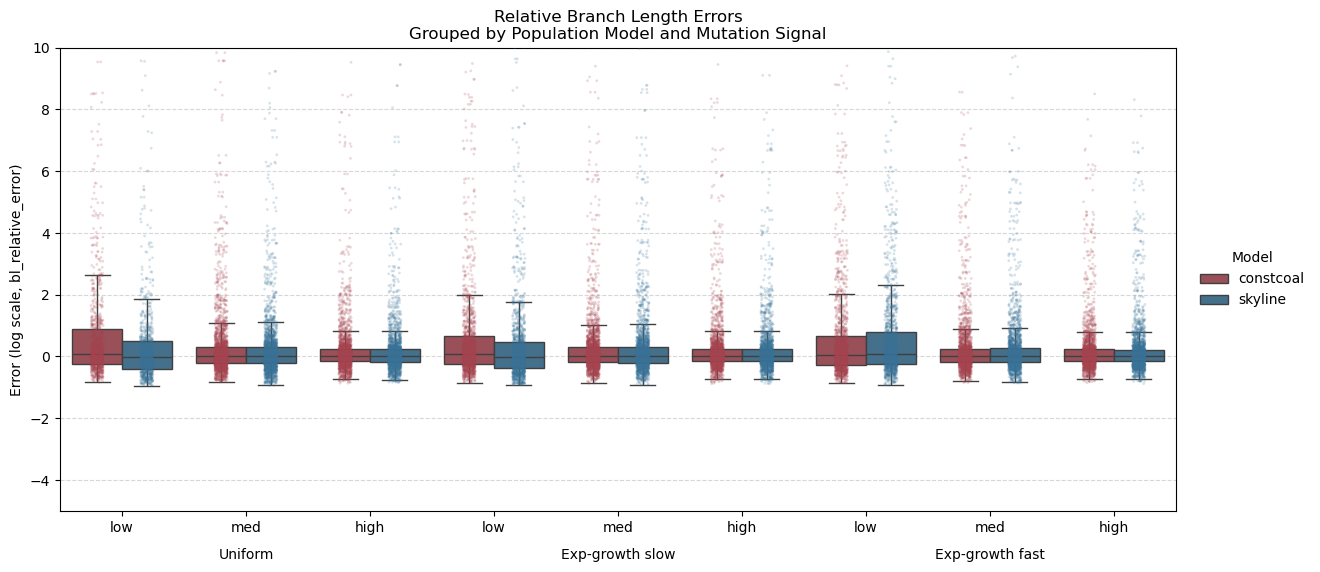

In [ ]:
boxplot_branch_length_errors(tree_metrics_combined, metric="bl_relative_error", title="Relative Branch Length Errors\nGrouped by Population Model and Mutation Signal", logscale = False)

## Error in root height
Consider all trees.

In [ ]:
root_height_df = root_height_all_trees(overview_df_)
root_height_df.head()

,tree_name,tree_index,sim_root_height,estimated_root_height,model,growth_model,mutsig,diff_root_height,rel_diff_root_height,abs_rel_diff_root_height
0,constcoal_homochronous_expgrowth_fast_highmuts...,0,743.045122,765.041192,constcoal,expgrowth_fast,high,21.996070,0.029603,0.029603
1,skyline_homochronous_expgrowth_fast_highmutsig.T0,0,743.045122,763.878424,skyline,expgrowth_fast,high,20.833302,0.028038,0.028038
2,constcoal_homochronous_expgrowth_fast_highmuts...,1,951.837370,971.788938,constcoal,expgrowth_fast,high,19.951567,0.020961,0.020961
3,skyline_homochronous_expgrowth_fast_highmutsig.T1,1,951.837370,969.368941,skyline,expgrowth_fast,high,17.531570,0.018419,0.018419
4,constcoal_homochronous_expgrowth_fast_highmuts...,2,797.974702,815.433676,constcoal,expgrowth_fast,high,17.458974,0.021879,0.021879


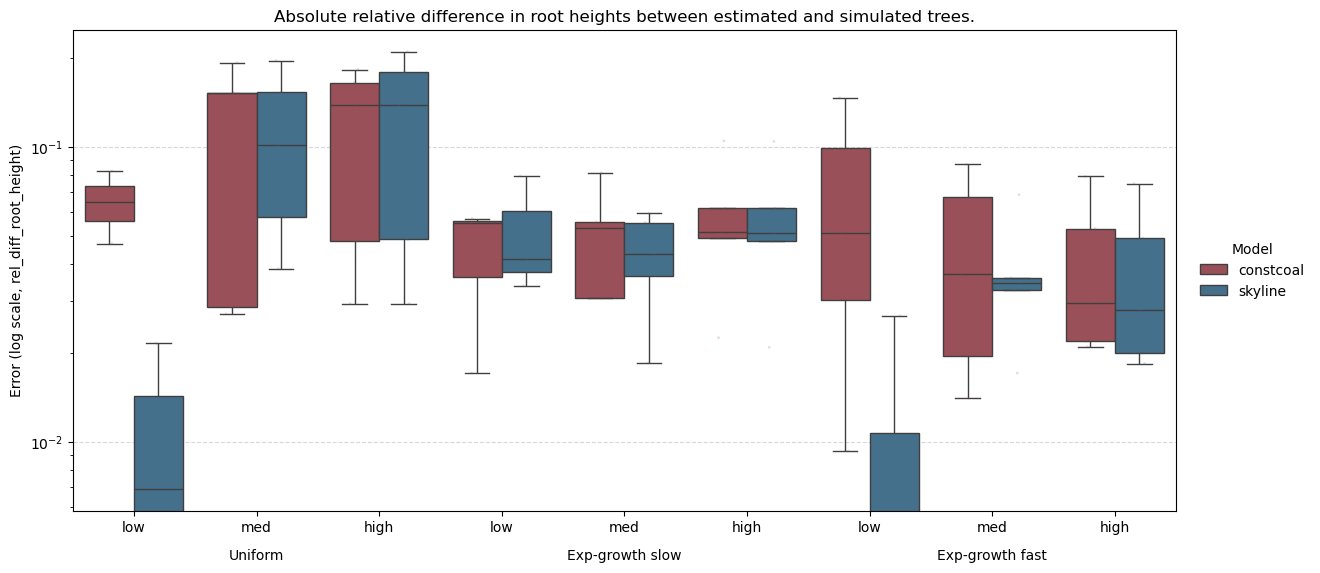

In [ ]:
boxplot_branch_length_errors(root_height_df, metric='rel_diff_root_height', title = 'Absolute relative difference in root heights between estimated and simulated trees.')

## Error development over time

In [ ]:
tree_metrics_combined.head()

,node,bl_sim,bl_constcoal,bl_ci_lower_constcoal,bl_ci_upper_constcoal,bl_inside_ci,height_sim,height_constcoal,height_ci_lower_constcoal,height_ci_upper_constcoal,...,bl_relative_error,bl_abs_relative_error,height_diff,height_relative_error,height_abs_relative_error,tree_name,tree_index,model,growth_model,mutsig
0,internal_0,0.000000,0.000000,NaN,NaN,None,743.045122,765.041192,509.413791,867.970263,...,NaN,NaN,21.996070,0.029603,0.029603,constcoal_homochronous_expgrowth_fast_highmuts...,0,constcoal,expgrowth_fast,high
1,internal_1,518.575584,518.214155,345.512249,606.826999,True,224.469538,246.827037,163.901542,302.452352,...,-0.000697,0.000697,22.357499,0.099601,0.099601,constcoal_homochronous_expgrowth_fast_highmuts...,0,constcoal,expgrowth_fast,high
2,internal_2,113.635019,126.616319,46.602996,177.246902,True,110.834519,120.210717,93.324512,156.478815,...,0.114237,0.114237,9.376198,0.084596,0.084596,constcoal_homochronous_expgrowth_fast_highmuts...,0,constcoal,expgrowth_fast,high
3,internal_3,36.249445,34.151642,7.790689,68.594386,True,74.585074,86.059075,63.141514,115.148970,...,-0.057871,0.057871,11.474001,0.153838,0.153838,constcoal_homochronous_expgrowth_fast_highmuts...,0,constcoal,expgrowth_fast,high
4,internal_4,26.513970,29.457428,10.743115,58.358435,True,48.071105,56.601647,37.673112,79.766504,...,0.111015,0.111015,8.530542,0.177457,0.177457,constcoal_homochronous_expgrowth_fast_highmuts...,0,constcoal,expgrowth_fast,high


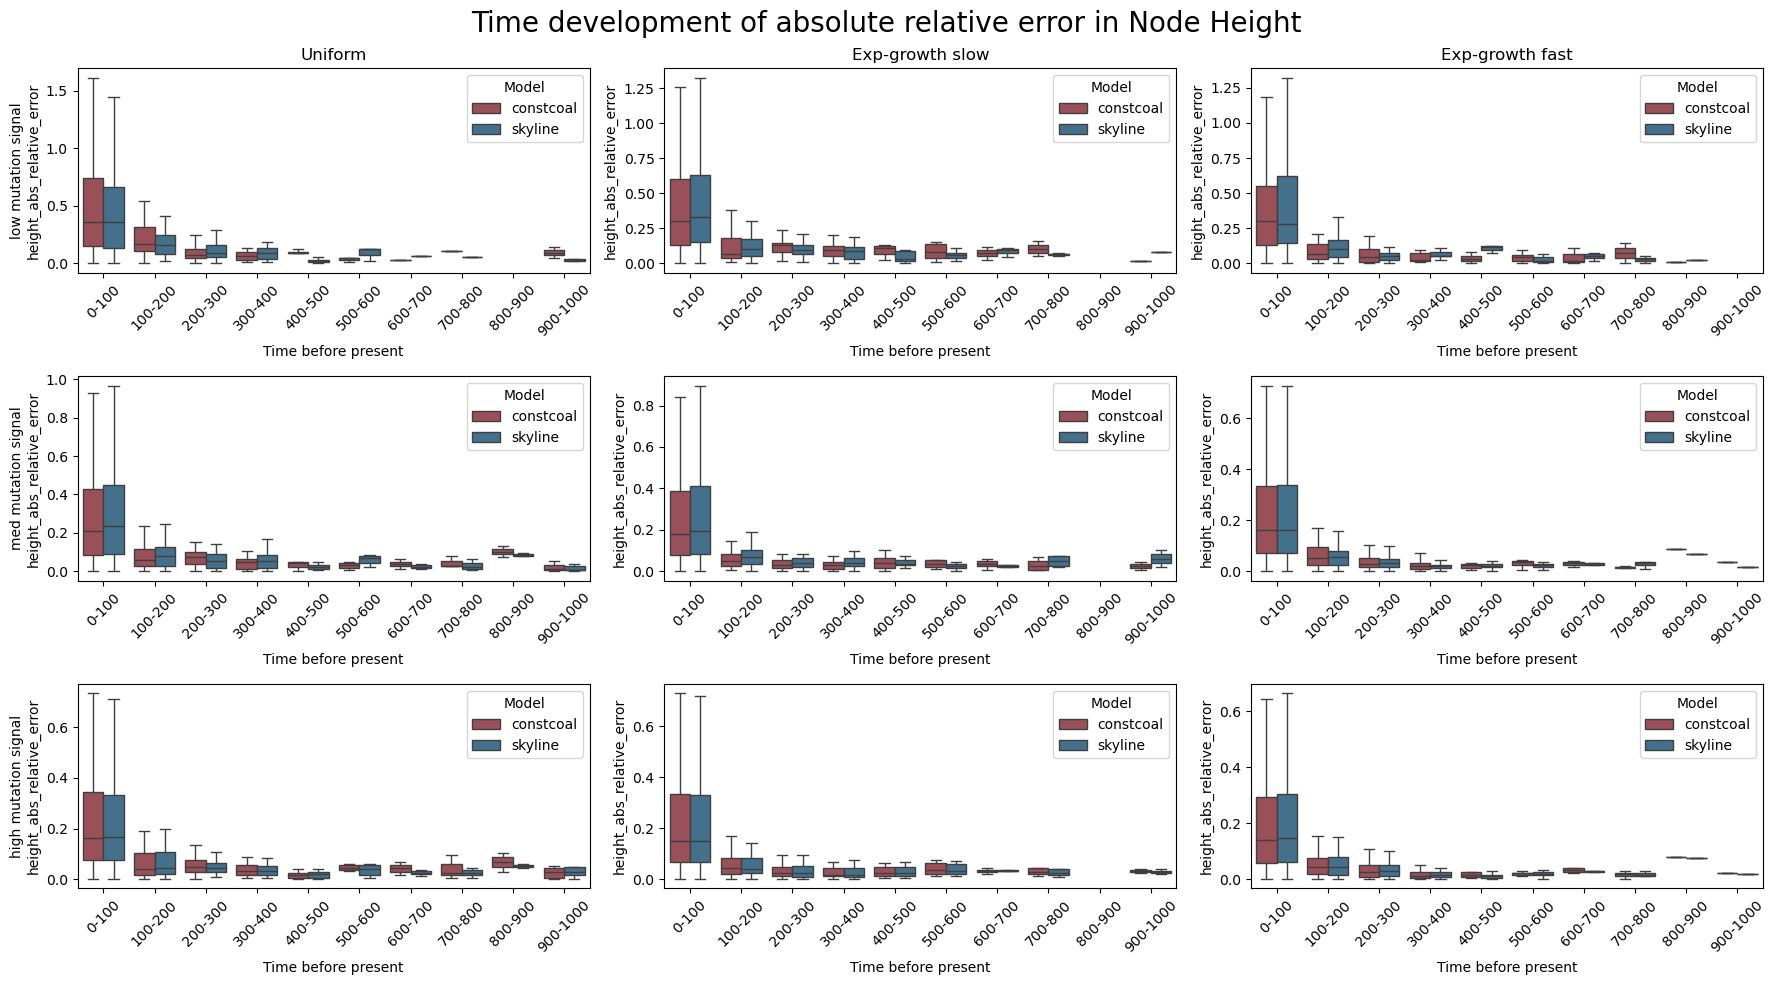

In [ ]:
plot_height_error_grid(df=tree_metrics_combined, y_max=1000, bins=10, error_col='height_abs_relative_error' ,title="Time development of absolute relative error in Node Height")

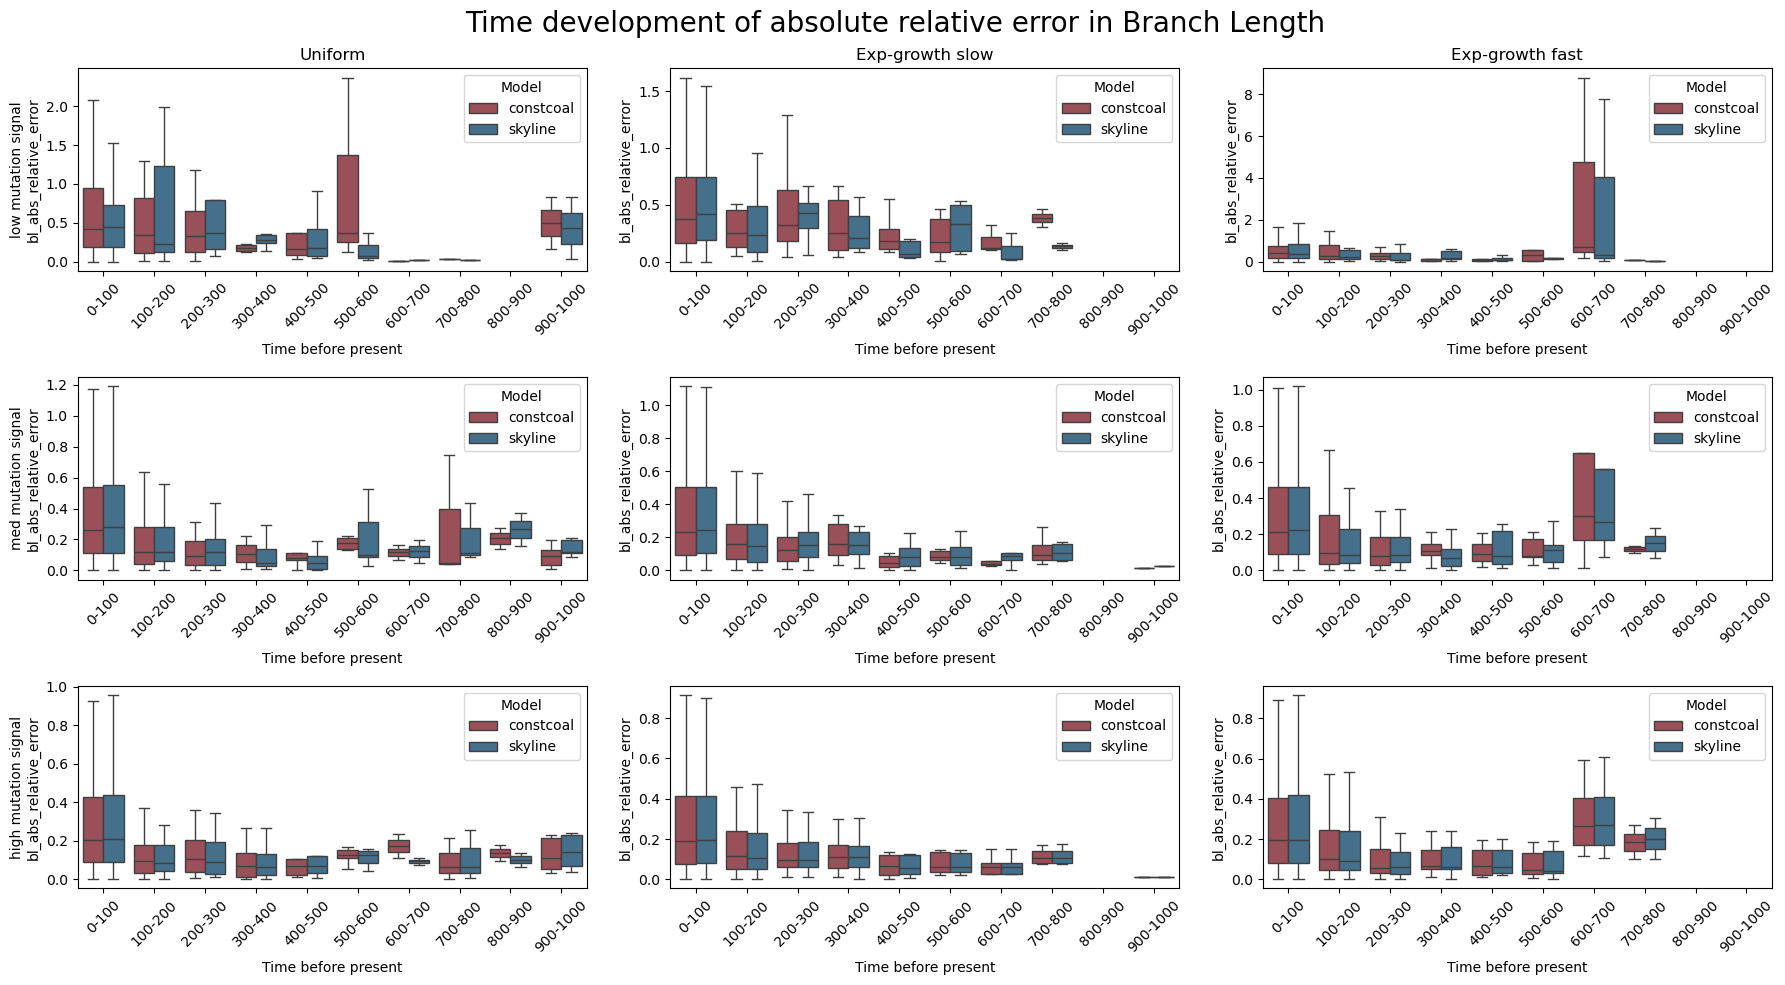

In [ ]:
plot_height_error_grid(df=tree_metrics_combined, y_max=1000, bins=10, error_col='bl_abs_relative_error',title="Time development of absolute relative error in Branch Length")

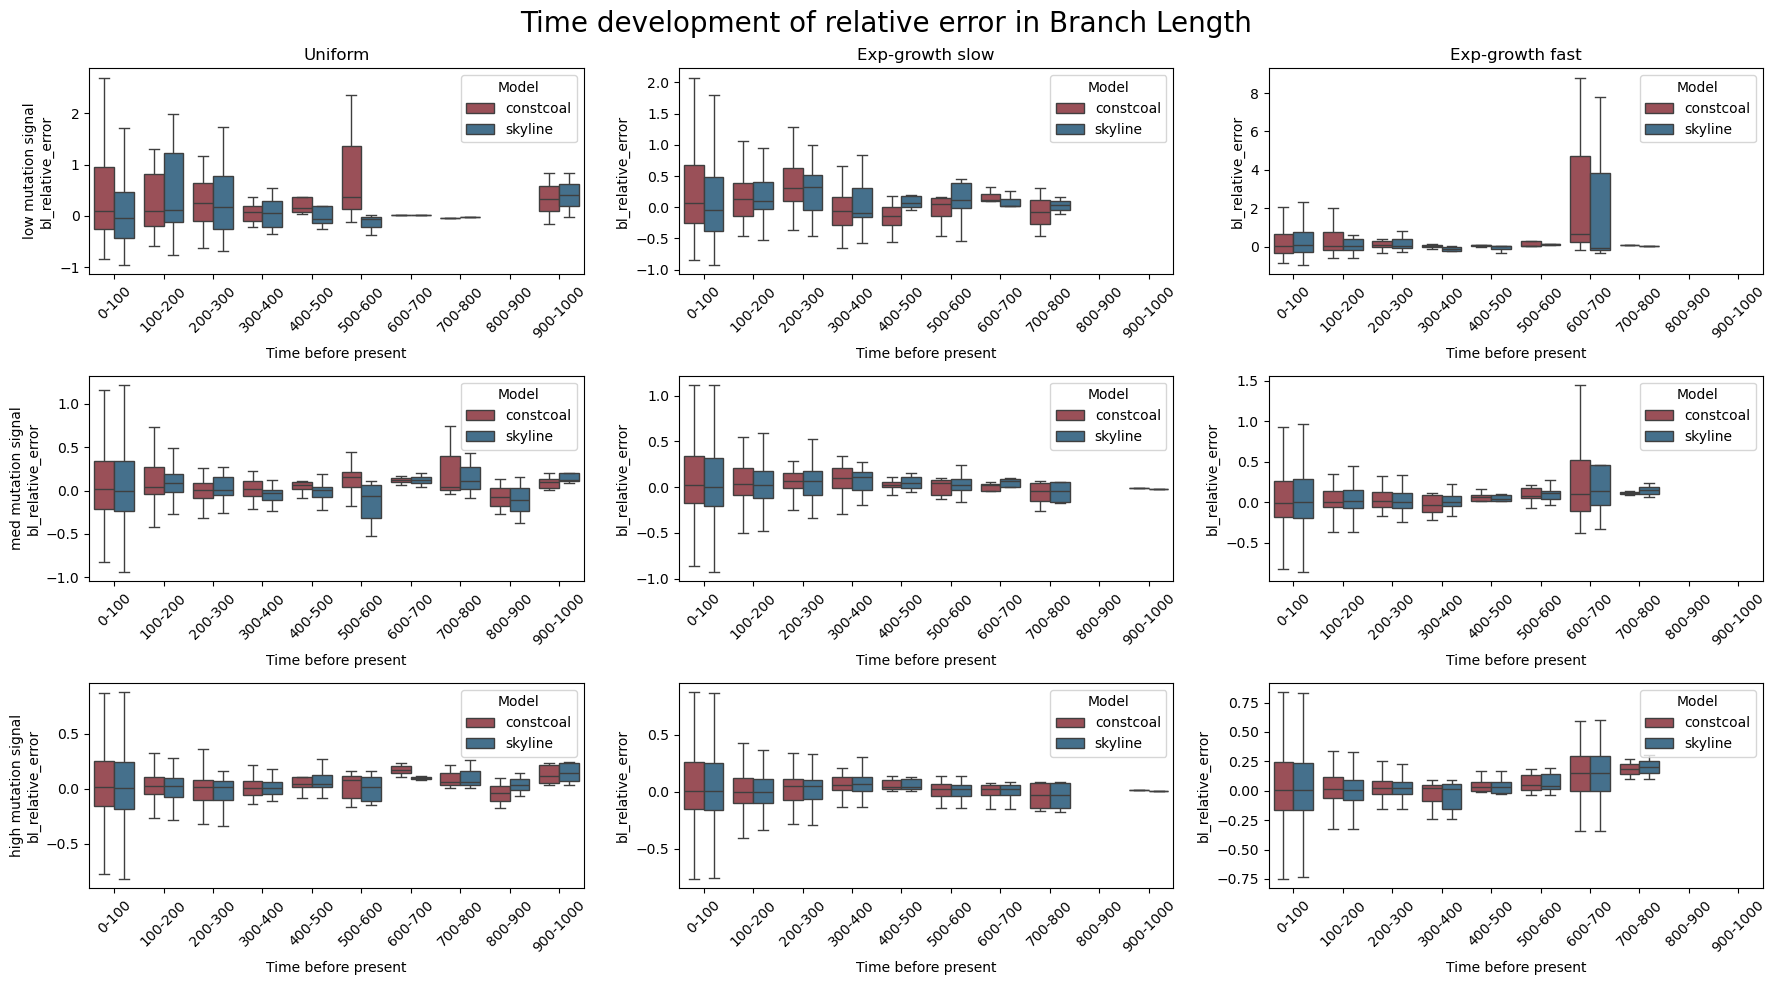

In [ ]:
plot_height_error_grid(df=tree_metrics_combined, y_max=1000, bins=10, error_col='bl_relative_error',title="Time development of relative error in Branch Length")

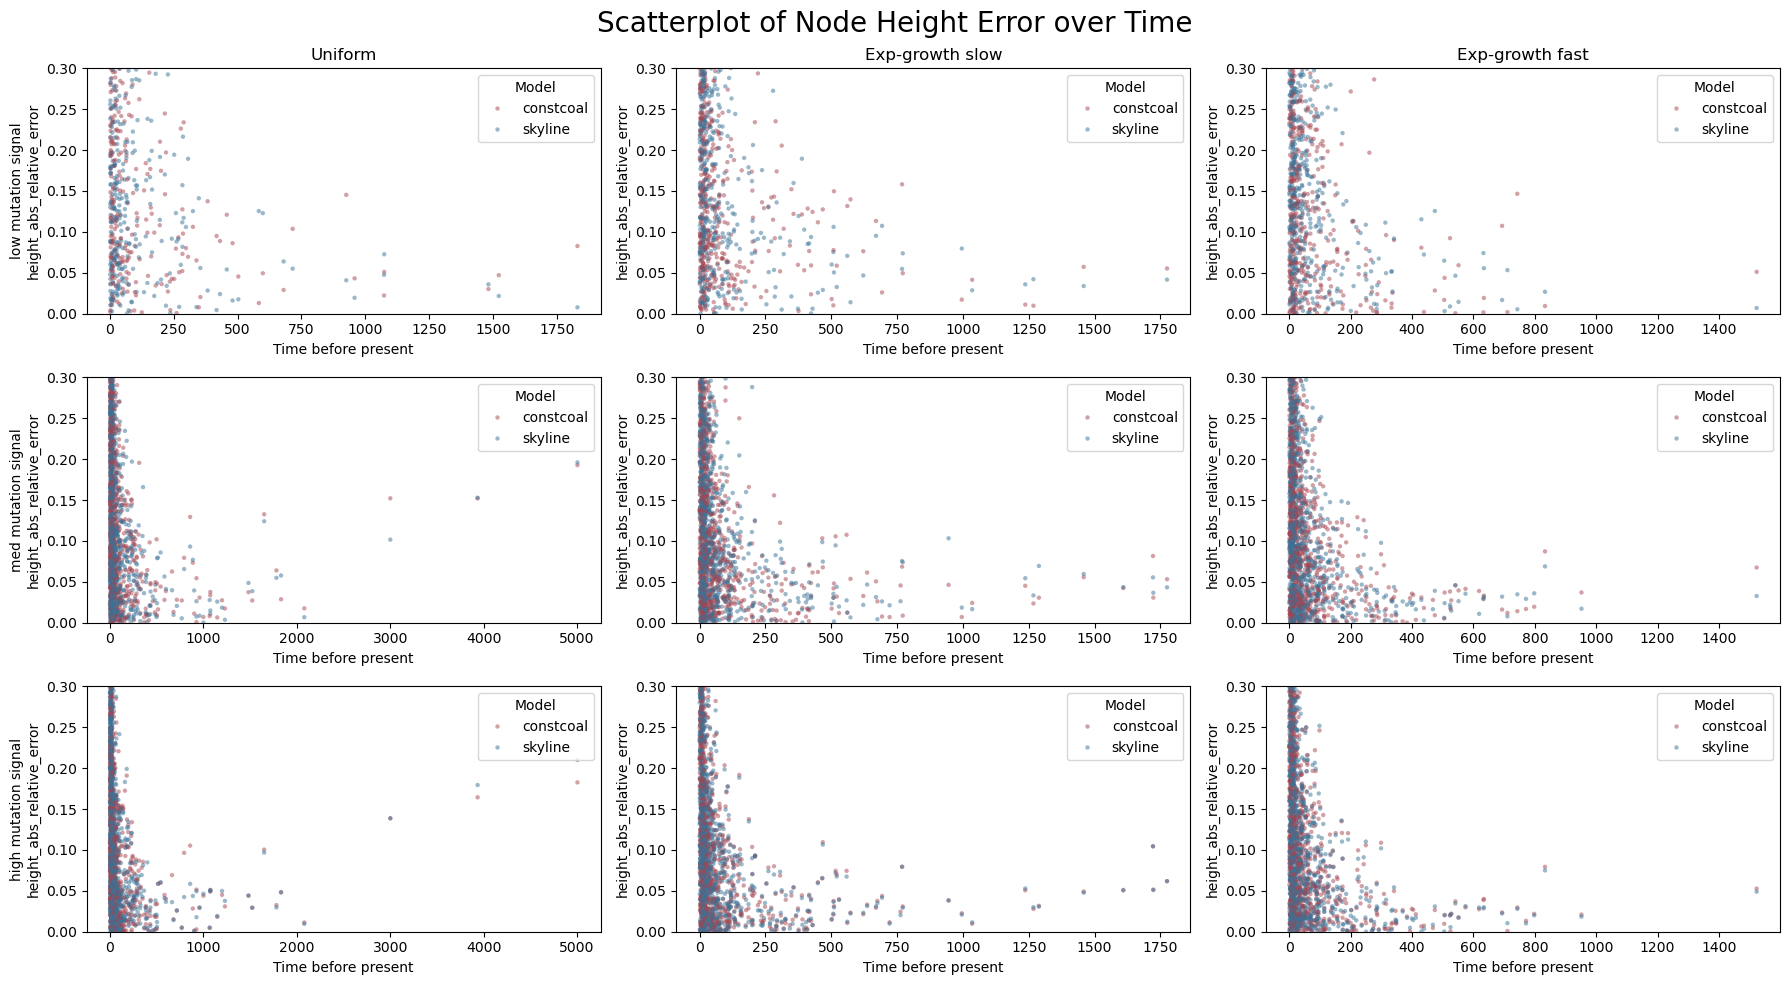

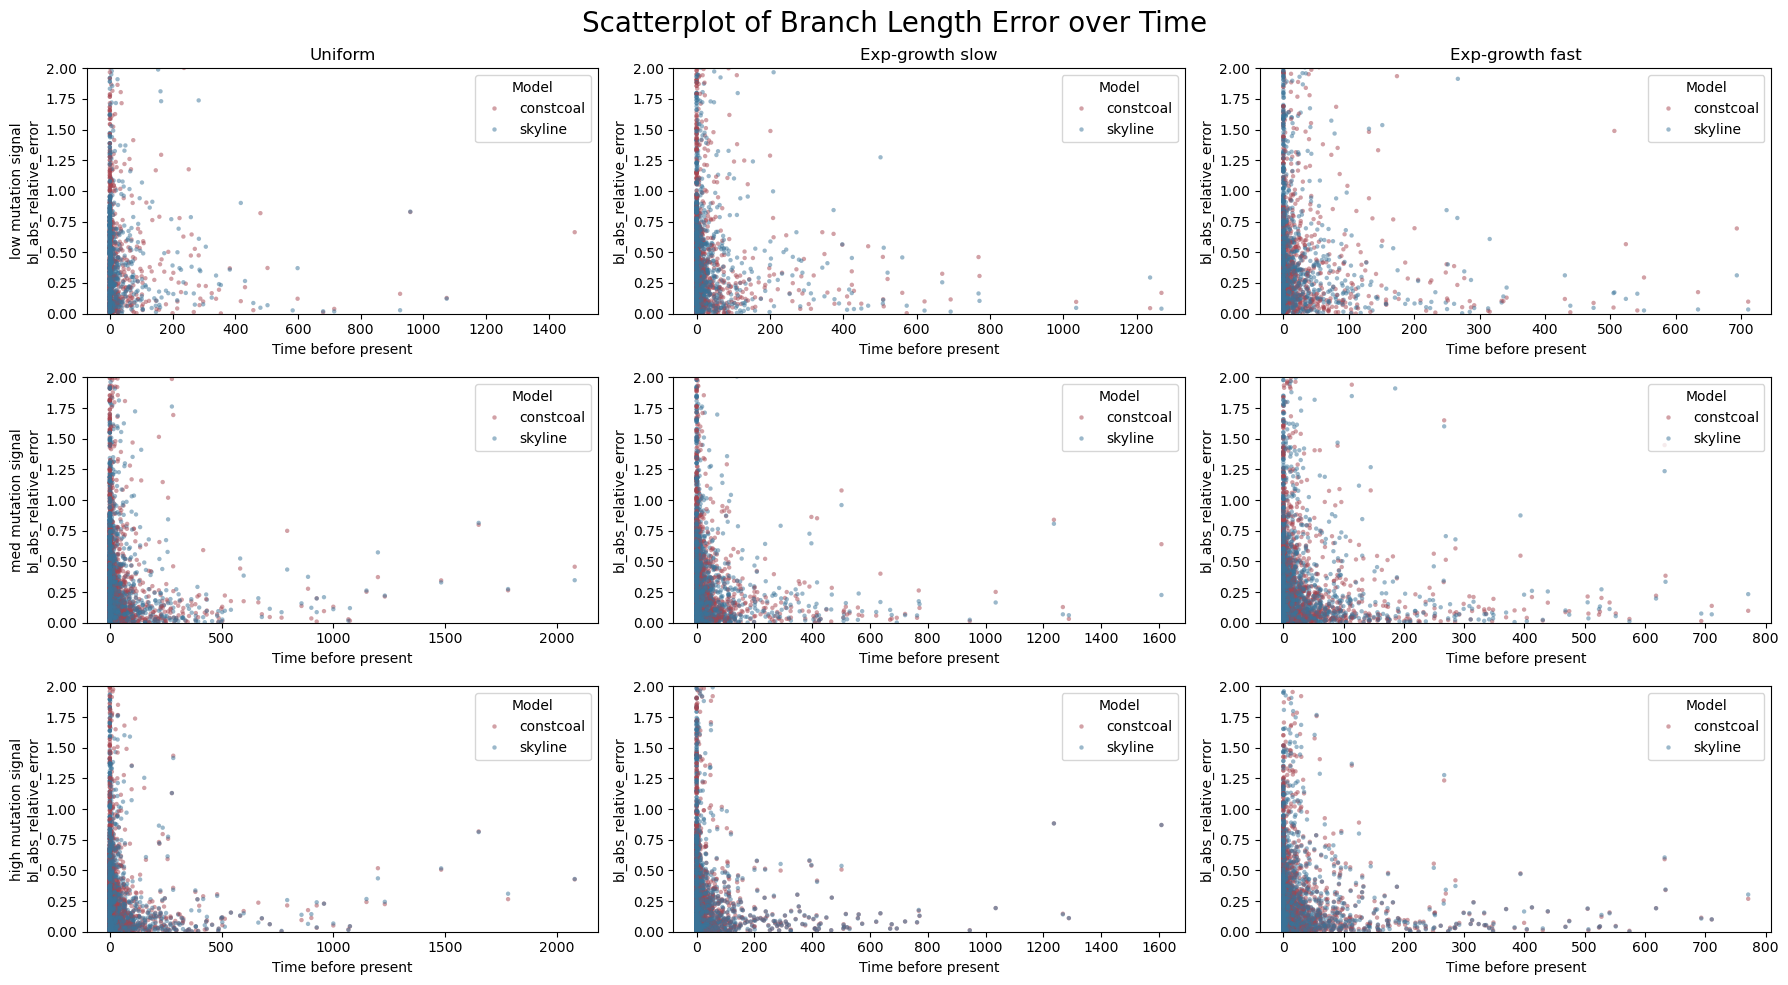

In [ ]:
plot_height_error_grid_scatter(
    df=tree_metrics_combined,
    error_col="height_abs_relative_error",
    title="Scatterplot of Node Height Error over Time",
    y_range=(0,0.3)
)
plot_height_error_grid_scatter(
    df=tree_metrics_combined,
    error_col="bl_abs_relative_error",
    title="Scatterplot of Branch Length Error over Time",
    y_range=(0,2)
)


In [ ]:
tree_metrics_combined

,node,bl_sim,bl_constcoal,bl_ci_lower_constcoal,bl_ci_upper_constcoal,bl_inside_ci,height_sim,height_constcoal,height_ci_lower_constcoal,height_ci_upper_constcoal,...,bl_relative_error,bl_abs_relative_error,height_diff,height_relative_error,height_abs_relative_error,tree_name,tree_index,model,growth_model,mutsig
0,internal_0,0.000000,0.000000,NaN,NaN,None,743.045122,765.041192,5.094138e+02,8.679703e+02,...,NaN,NaN,21.996070,0.029603,0.029603,constcoal_homochronous_expgrowth_fast_highmuts...,0,constcoal,expgrowth_fast,high
1,internal_1,518.575584,518.214155,345.512249,606.826999,True,224.469538,246.827037,1.639015e+02,3.024524e+02,...,-0.000697,0.000697,22.357499,0.099601,0.099601,constcoal_homochronous_expgrowth_fast_highmuts...,0,constcoal,expgrowth_fast,high
2,internal_2,113.635019,126.616319,46.602996,177.246902,True,110.834519,120.210717,9.332451e+01,1.564788e+02,...,0.114237,0.114237,9.376198,0.084596,0.084596,constcoal_homochronous_expgrowth_fast_highmuts...,0,constcoal,expgrowth_fast,high
3,internal_3,36.249445,34.151642,7.790689,68.594386,True,74.585074,86.059075,6.314151e+01,1.151490e+02,...,-0.057871,0.057871,11.474001,0.153838,0.153838,constcoal_homochronous_expgrowth_fast_highmuts...,0,constcoal,expgrowth_fast,high
4,internal_4,26.513970,29.457428,10.743115,58.358435,True,48.071105,56.601647,3.767311e+01,7.976650e+01,...,0.111015,0.111015,8.530542,0.177457,0.177457,constcoal_homochronous_expgrowth_fast_highmuts...,0,constcoal,expgrowth_fast,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37919,internal_247,11.621019,16.424143,1.762194,39.696802,True,13.848695,8.524275,3.658135e-01,2.654239e+01,...,0.413313,0.413313,-5.324420,-0.384471,0.384471,skyline_homochronous_uniform_medmutsig.T4,4,skyline,uniform,med
37920,t6,13.848695,8.524275,0.365813,26.542393,True,0.000000,0.000000,2.729976e-07,2.730039e-07,...,-0.384471,0.384471,0.000000,0.000000,0.000000,skyline_homochronous_uniform_medmutsig.T4,4,skyline,uniform,med
37921,internal_248,11.078258,7.633933,0.001360,26.277708,True,2.770437,0.890342,3.407837e-05,1.947565e+01,...,-0.310909,0.310909,-1.880095,-0.678628,0.678628,skyline_homochronous_uniform_medmutsig.T4,4,skyline,uniform,med
37922,t7,2.770437,0.890342,0.000034,19.475651,True,0.000000,0.000000,2.689967e-07,2.690040e-07,...,-0.678628,0.678628,0.000000,0.000000,0.000000,skyline_homochronous_uniform_medmutsig.T4,4,skyline,uniform,med


## Tests on one tree 
Calculate branch lengths and node heights

In [ ]:
treepath_sim = "../results/pop_size_simulations/independent_homochronous/uniform/uniform.trees"
tree_generator = Phylo.parse(treepath_sim, "newick")
next(tree_generator)           # This skips the first tree
tree_sim = next(tree_generator)  # This gets the second tree

treepath_constcoal = "../results/pop_size_simulations/simulation_results/homochronous_independent/skyline/uniform/lowmutsig/skyline_homochronous_uniform_lowmutsig.T1.tree"
tree_constcoal = next(Phylo.parse(treepath_constcoal, "nexus"))

In [ ]:
compare_tree_metrics(tree_sim, tree_constcoal).head()

,node,bl_sim,bl_constcoal,bl_ci_lower_constcoal,bl_ci_upper_constcoal,bl_inside_ci,height_sim,height_constcoal,height_ci_lower_constcoal,height_ci_upper_constcoal,height_inside_ci,internal,bl_diff,bl_relative_error,bl_abs_relative_error,height_diff,height_relative_error,height_abs_relative_error
0,internal_0,0.000000,0.000000,NaN,NaN,None,1830.844680,1816.783318,1426.698250,2.387077e+03,True,True,0.000000,NaN,NaN,-14.061361,-0.007680,0.007680
1,internal_1,1683.798890,1704.772487,1302.423884,2255.844032,True,147.045790,112.010832,52.365606,2.465811e+02,True,True,20.973597,0.012456,0.012456,-35.034958,-0.238259,0.238259
2,internal_2,57.371395,42.301515,0.210189,176.461201,True,89.674395,69.709317,20.886432,1.789809e+02,True,True,-15.069880,-0.262672,0.262672,-19.965078,-0.222640,0.222640
3,t233,89.674394,69.709317,20.886432,178.980918,True,0.000000,0.000000,0.000000,4.547474e-13,True,False,-19.965077,-0.222640,0.222640,0.000000,0.000000,0.000000
4,internal_3,30.374518,17.495000,0.001504,132.435467,True,59.299877,52.214317,11.483451,1.391829e+02,True,True,-12.879518,-0.424024,0.424024,-7.085560,-0.119487,0.119487


In [ ]:
total_length = sum(clade.branch_length for clade in tree_sim.find_clades() if clade.branch_length)
#total_length * 0.00045 * 450
total_length

19998.438477568874

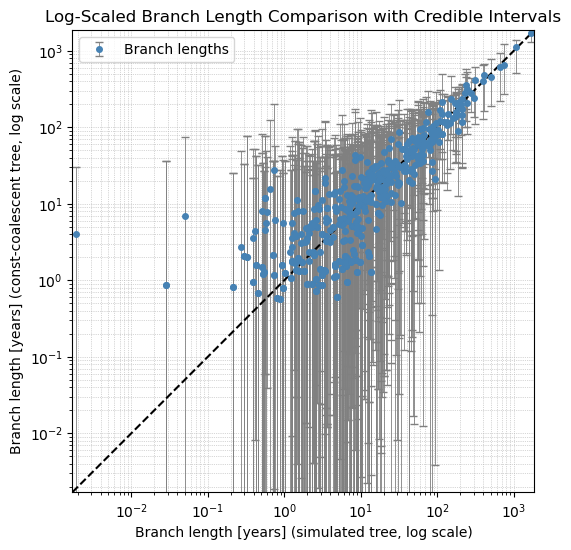

,node,bl_sim,bl_constcoal,bl_ci_lower_constcoal,bl_ci_upper_constcoal,bl_inside_ci,height_sim,height_constcoal,height_ci_lower_constcoal,height_ci_upper_constcoal,height_inside_ci,internal,bl_diff,bl_relative_error,bl_abs_relative_error,height_diff,height_relative_error,height_abs_relative_error
0,internal_0,0.000000,0.000000,NaN,NaN,None,1830.844680,1816.783318,1426.698250,2.387077e+03,True,True,0.000000,NaN,NaN,-14.061361,-0.007680,0.007680
1,internal_1,1683.798890,1704.772487,1302.423884,2255.844032,True,147.045790,112.010832,52.365606,2.465811e+02,True,True,20.973597,0.012456,0.012456,-35.034958,-0.238259,0.238259
2,internal_2,57.371395,42.301515,0.210189,176.461201,True,89.674395,69.709317,20.886432,1.789809e+02,True,True,-15.069880,-0.262672,0.262672,-19.965078,-0.222640,0.222640
3,t233,89.674394,69.709317,20.886432,178.980918,True,0.000000,0.000000,0.000000,4.547474e-13,True,False,-19.965077,-0.222640,0.222640,0.000000,0.000000,0.000000
4,internal_3,30.374518,17.495000,0.001504,132.435467,True,59.299877,52.214317,11.483451,1.391829e+02,True,True,-12.879518,-0.424024,0.424024,-7.085560,-0.119487,0.119487


In [ ]:
branch_length_df = compare_tree_metrics(tree_sim, tree_constcoal)
plot_tree_comparison(branch_length_df)
branch_length_df.head()

In [ ]:
print(f"Percentage of esitmates inside CI: {branch_length_df['bl_inside_ci'].sum() / len(branch_length_df) * 100} %")

Percentage of esitmates inside CI: 99.79959919839679 %


In [ ]:
# Drop any NaNs (e.g. from division by zero)
df_violin = branch_length_df.dropna(subset=['relative_error'])

# Plot violin plot
plt.figure(figsize=(6, 5))
sns.violinplot(y=df_violin['relative_error'], inner="box", color="skyblue")

# Add individual points (with jitter)
sns.stripplot(
    y='relative_error',
    data=df_violin,
    color='black',
    size=3,
    alpha=0.6,
    jitter=0.15
)

plt.title("Distribution of Relative Absolute Branch Length Errors")
plt.ylabel("Relative Absolute Error")
plt.xlabel("")
plt.grid(True, axis='y', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

KeyError: ['relative_error']

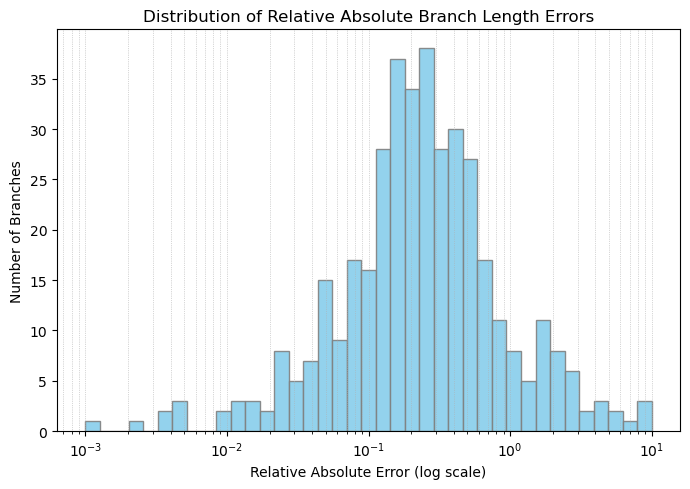

In [ ]:
# Plot histogram with log x-axis
plt.figure(figsize=(7, 5))
plt.hist(branch_length_df['abs_relative_error'], bins=np.logspace(-3, 1, 40), color='skyblue', edgecolor='gray', alpha=0.9)

plt.xscale('log')
plt.xlabel("Relative Absolute Error (log scale)")
plt.ylabel("Number of Branches")
plt.title("Distribution of Relative Absolute Branch Length Errors")
plt.grid(True, which='both', axis='x', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# relative error
np.abs(branch_length_df['relative_error']).describe()

# Outliers steering error

count    398.000000
mean       1.010940
std        6.429095
min        0.000520
25%        0.121289
50%        0.231004
75%        0.489077
max      122.003045
Name: relative_error, dtype: float64

In [ ]:
np.abs(branch_length_df['difference']).describe()

count    399.000000
mean       6.048769
std       13.414403
min        0.000000
25%        1.296347
50%        3.032439
75%        6.266887
max      197.257228
Name: difference, dtype: float64

## Calculate average number of mutations

In [ ]:


# Path to your combined alignment
alignment_file = "../results/pop_size_simulations/simulation_results/homochronous_independent/constcoal/uniform/combined_alignments.fasta"

# Group sequences by tree ID (assuming headers like >T0_seq1, >T1_seq2, etc.)
tree_seqs = defaultdict(list)
for record in SeqIO.parse(alignment_file, "fasta"):
    tree_id = record.id.split("_")[0]  # Extract 'T0', 'T1', etc.
    tree_seqs[tree_id].append(record.seq)

def count_pairwise_mutations(seqs):
    """Returns list of all pairwise mutation counts between sequences in a tree."""
    n = len(seqs)
    mutation_counts = []
    for i in range(n):
        for j in range(i+1, n):
            diffs = sum(a != b for a, b in zip(seqs[i], seqs[j]) if a != '-' and b != '-')
            mutation_counts.append(diffs)
    return mutation_counts

# Store per-tree statistics
per_tree_stats = {}

all_mutation_counts = []

for tree_id, seqs in tree_seqs.items():
    mutations = count_pairwise_mutations(seqs)
    mean = np.mean(mutations) if mutations else 0
    std = np.std(mutations, ddof=1) if len(mutations) > 1 else 0
    per_tree_stats[tree_id] = {"mean": mean, "std": std}
    all_mutation_counts.extend(mutations)
    print(f"{tree_id}: mean = {mean:.2f}, std = {std:.2f}")

# Overall statistics
overall_mean = np.mean(all_mutation_counts)
overall_std = np.std(all_mutation_counts, ddof=1)

print(f"\nOverall average pairwise mutations per tree: {overall_mean:.2f}")
print(f"Overall standard deviation: {overall_std:.2f}")

FileNotFoundError: [Errno 2] No such file or directory: '../results/pop_size_simulations/simulation_results/homochronous_independent/constcoal/uniform/combined_alignments.fasta'

In [ ]:
count_pairwise_mutations(tree_seqs['T1']).summary()

NameError: name 'count_pairwise_mutations' is not defined

In [ ]:
len("TATATTACAGAATCAACAAACGTGTCTTGCAATGCTGGGCGCGAAGGCTATAAAGCCTACTTACCTGGCATACCCAAAAGCAAACAGCTTTCGTATTTAATTGATGCGTTGGTTCGTAACAGCAGTCCAAATAAATCGTCCAGAAGTAAGCTAGGAAGACAAGGCCAATTATCTAAAGGTCCTAACAATGAACGGGGCTGGTTGCCTTGAGCGCTGTTTATCAAAATGCAATGCGTCCCTGTTCATGCTATGTAAGTAAGTCAAACAAAAATATGCGTCGCGTTGAACACCAAGTGACTCGATAGACGACAGCCGGCCTGGTTCGGTCCTGAAGTGCAACCCAACGCCGATCTTTACACACGCTCAGAGCTCGTGATTGTATCTCTTGGGACGTAGCGAGGAATTACTCGGCAGTGTCTTCTTAAACGTCTGGCATTCATTGCCTTCCTGCCGTTTCCAGAATATTTCCTATCTGATCAGTATCCCGCTAGCGTGGATGCGCTCTTCCTTCATCCTAAGCCAAGCAGGCAGCTGCGGTATAACAAGTTATAGCGAGCCGGTGCTAGCCCCGAGCAATGTCGGCTGTTGATTAAAAGGTTATCCGTGTAGAGATATGGTTTTACAACAAAATCTGCCTTTAGGCCTACCTACACGATTTGTCATGGGTGATAGTCCAGTAGAAAATCCTGGCCGGGCCATGTGCCCCGTTAGGATCAACGTAGCCCATATTAGTTTTGTCTTCTATCTGGTAAGATCCGTCCCACTTTAATCGTGATCACGAAGAGTTTGCATCGGACCCGATCACATGATGCTTGGGCTGCTTGTATAGTTTGCCACAACCGAAATTAGAGGTCTAAACCTGTTTTGCATGCAAATTATACGTTTACTACAGGTTGTCGTTGGCTCTCGCGTCTACAGTCGGATGTGATATCGTCCCATTGCCGTTGACGTACGTAGGAAGAGGGCGAACAGGTCGCTTCTTGGCAGGCAATGTATTTCTGAGTCTTACATTGTTGTCTCTCCAATTTAATCGTCCTACGAGCTGTGTTTTCGTGAAGGAACGAGTTCGAGTACCACAATGCAGCACTTTTCTTCAGACTAGCTGGGTCCTCAACTATAGCGCTAACTGTCATTGCTATACGCTCTTTTCCAGGTTCCTGCCAACCCCTCCAGATACTCGTTTCGAATGTTCATTAGGTAATGCACCCCTTCTGCTAAATTGGGTCAGACGTCGTACTCATTGGACACTGCCTAGCTGCTAGTATGGATAACTAATCACTGGTCGGCTACATAAGGTAATATTGGCTATACTTCTAATCCGCCAGGTGGTTCCCGCGTGAGACTTTTTCCTGTCAAGTTCCCAACCCCAAAGGGCAGATCTTTACACCCTGTACTCAGTCGATGAATGGACTCAGTTTGAGACTCCCTTTATAATCAGGCCATGTGCACCCCGACGGACCCATGCCTCCTGGGCTAGGTCCCAGCGACCACCTAGCGATTGCAATGGCATCCGTCAGCCTGCTCAGTGTCCCTGTGGCACGTTTCCTGGCTACTGACTAGAGCCATAGTGACGGTAGTGTAAATTGCGAAGTTTACGGTGCGGTAATGCCATATCGCGCCGTGTAATGGGCGGGGCGGCGAATGATATACAAGACTGAATCCTCCGGGACCAAGCGAAGGGCTATATAGCCTCGGGACAAGGTGCAAGGTGCCAAAGGGTACTGGCGAAGGGCGGTTTTGGAAACTCTTGTGGCTGAGGCTTTAAGGTTGTGTTATAGCGCGTTACTCTCAGGACAGATCTTGTCACACCCTAACAATCACGCTGATTTTGAATTTACTAATGAGCGCGTGCCCGACACACCCGTTTTTACCTTAATTTTTTTTAAGGTGCGCCAATCAACACTTCATTCAGCACAGGGCTTATTAAGAATAGAGAGGAACTCCAGCGAGGCCCTAGTTTATCTGGGATTTGGCGGACTATCACTATATACTAATAGGAGATTTCTCTGCCAAACACGCGCGCTGGAGGCCTAACAAGCTCCGGCATCGGCGCATTCATCTGGGAACACCCCAAGGTCGACGTGAGGACAGGACTCACCGCCATATAGGAGCTATCACACATCGTTTTGGGCTGTGGCCCACCCACACGCGTCCGGGAGTATGAGGGGTGGCCGTAACTTTTTTGTCCTTGTGCTTTCTAAAGTGCGGGGTCGTATAAGTCTCAGCCATCAGTTAGTGTCGAACGAACGGAATGGTCGTGGACGTTAACCACGGGTCCAGCTTAAACACGACGAAATTTCAGGACTCCGCTTTAGGTATTTCGGCCTATGATTTCACGTTGCGCATATGATCAATGTCACCGTGAGAGGCGAACTTAGGTGGGATACGAGTTAAATATATGAATTTCAGGAGATGGTTTAACCTTATTCCAAAGCGTGGTAAAATGGCAAACCCACATTCGCTGGGAACGGATTGCGTCTGCCGTCAGGCAGTGTCGATCGTACGTAAGACCTCCTTTTTTGACCTTCCGTCCGAAAACTAATTCGTGTCCTAATCCTGAATCCCCTCAATACTCCTCTAATTGGACTCCATGCACCTTCAACGCGGTCAAAGAACTGCACTGGCCTCCCCTGGATACCCACTAGGATAATATGAACGCGGGAAGTCGCTGCCCACGAGCAGCAACTCCGAGAATGCCGTCTCCAAGTTGGTAATTCCCTAACACACCGCTTGTCTCGATGCACATCAGCCTTGATTAATCGTAGTTTAACATGACCCAACCCAGTTTCGCCTGCTGCGCTCCGAGGGCGGATATCGTACATCAGTCTGATTTGCTATGGTAGGGAGCTCCAGTTTAGTCGATTGAGGCCCATTATTCGACCTAGTCAAGTGAATGTCCCTTTATAGCCATGAACGAAATTCGGAGATGTCAACGGATTAAGTGTCTTATACTCTAAGGGCAAGCACGGGGCACCAATTTAACTCAGGCTGAAGTAGTGACTGATTTCTGTGTTGTCCCCCGGCTATGACTGACACCTATCCTTCGTCTATGAACCCTGAGCGCCTTCTATGGAATAAAACGGGGTTACTTTAGATCAATAATACGCTTGTCGCTTACTTGCGTCATTTCAAACCCAGACCTTATGAATAGCCCCGCACGGTGTATGTTGTGTCGTCTGCCTAGACGTTGATGGAGATAACTGAGGCGGCCGTTGGAGGAGTAAACGGTGCTCAAGGATCGGCAAAGCACTGTAAGCAGAGCTATTGACCGCGTTAAGCTCCATACAGTACGCTATGAAGAGACGACATTACTTACTGAAGCGGGCTCCCGTAATTGGAAGTCCTCGAAGAAGATCCAACCGTCGGAGCTTTGTACGCTGTCATTGAAAGAGGATCGCCATCGCTTGACGCGCTAGGGACGTACCCCGAGATTAAAATAATTGGCTGAGAACCGAGCGCCGTGTAAGACGAGTTAAGGGCGAGAAACACTAAAACAGAGTCCTGTGCCTTTCAGCAACTTCCCCACGTATCAGGCCAACCGTAATGCCCCCGAAACTCCCTAGTTTGCCGTGTCCATATTATGACACGTATGGGCAGTTAGGAGGTTTCGGTCCCTAAATAACACTAAAGACACGCAGACACAAATTTGAGTACTGAACCACAAAAGTATAACCCTTTTAGAAACGTCCTCTACGGCACCGTCAACATCGCAACTCGCATCAGGGAGGTTAAATAGACTGGGATCATATTGTCCTCTTAATAGGAATACGGGCCAGTGCAGCCATGAGTTACTCCACGTTCCGGACCTATGGGTGTCCTACTTTATTATAGATTTGGCCACATAGCCGCGACACTCAGTGGTGGCCCCGTAAAGATTGTGGATCGTGTCTGAGGATGTCAAGAATTGAAACGGGTTAACCTTGCAACGCCCCTATTTCAGTCCATCACCCAGGAAAGAGCTTACCGGTCGCCTGGTATTCCATACTCACGTGTGACAAGACGAATAGCACTTAAAGGATTGTTCGCCTGGGGGCTCATAATGCGTCCGAAAGTTTGCACGTGGGCGCTATCTTTGACACTGGCCCATAGTCAACTAGCTCGTCTGTGCCTTCTAGACCCTGCTTGAATGTCGACAATCCAGTCAATGCTCTAGCCTGTCCTACAGCCTAAGGTAACGCGACGGTCCGCGGCTAATACTTCTGTGACCATGACAACTGCTGGTTACAATTAGACCCTTACGTCCGGGGTTGAAGCCTACCCACCCACGTTTGGTGCATCCGGGTTATCTCGGACTAATTCGGTCCTGTGGTGTTACATTAATGGTGCTTAGTGAGCCCAACGGCTACGATGGCAACCGTCGATGCTCCGGTAATATTCTAATGGTAGGGCAGACGAATTGTGCGGAGTTCCGGGAATTTCGAAGCGTATAGCACGGAGTTTACGTTACCGACTCGTAACTCAATCGCAACGATCTTCTAGAGCCGTGCCGCATTGCCTCTGTGCCCACTAACCCGATGTGGCTGATCAATAACACTCCGGCTGGGGGGATAAGTGCTGGTATGGTCGAAGTCACTCACTACGCGCCTCTTAGGGGACGAGCCCACCATCTCTGGCAGTAAGGCCCTGGGGTTGATAGTATCTCACAATCCAGTTCATAGTAACTCTCCTTCCGTCTCGATTCCCGAGAGACTTATAGGCTCCCCGGCGTAACCCTGACAGACCTACGATGATTACTGCGTCCGTTCGCCATAGGATCCTGGAGCATAGTGCATCGATTTTATTAAGGATTTGTCAGGGAGCCTCTATAGGGAAATCCCTTATTGATTTTAGCATCCCTGACGGAACTTTTATTGTAAGCGGGCCATTTGTGCACCACGAGATACGCCGACACCTAACACTTTCATCGGGGCCAAGTCTCAGAGTAAACAATCAGCCGCGTAAGCCTAAAGTCACCAAAACCGCGAGTAGCCACATACCCTCGCAGTATATGAATGAGAGCCCGAGGGAATGTGATTTAACACCTGCTAACGCAATCCTTCAATGACTGGAGGGTGGGAATATCGTGCTCAATTTGCCGATCCCTCTTTTCGGCAGCAAGTGGTAGGTTACAAGTACAGGGGGACGTACTAACCATGCGGCAACAGTCACGCCAGAACTGATGGCTTGTGCTAGAGCGTGTCGGTACCCTCGTGGCCTATCTTAGATAATTCGGATTATACGGCCTACACCACGCGGCGAACCGCCAGTGGAAGATAATGTCTCGTCCTCAGATTTGGTAATTTGACCTTAGGTACTAGTAAAGGACTATTTTTAGCTGTGACTCAGCTAAACAGGTACGGACAGTGAGCGACGGACAACCAGGCAGACAGGAATCGGGGCATTCCGCGGTTGAGAGCGAGTAAACAACGGGCGGTTGTAAACACTCTACGCGCCAGAGGAGATGGATATCACGCTGGGCTGATGAGCCACTGAGCGGTCCGCACATCAATCTGATTTGTGTACGAATCGTGGGCTTGGGTTTATGGTGATAAAGTGAAACCACATCAACCCGTTCCATCGATAATGGGCTATGCCTCGAGACCTCGTATGCCGCGCGCTGCTCAATGGTCAGATGAGGAGTAGCAATCTCGTCTGTTCCTACAGGTGCGGAAATGCGGAAGACGTCATAAAATAATAATGAATAGGGTACTGTCTTATTTACATGGACGCCTGGATTGTGCACCGTCCTTCTGAATCATCCATGACGATGGCTACGCCCGGTTGCAAACCTGTTCTACGCTTCTCTCTCCCGAAGCCGCCTATCGACTCCCCGCCACAAGGGTGATGACACATCGAGA")

5837

In [ ]:
tree_seqs

defaultdict(list,
            {'T1': [Seq('GGCACTAGCAACTTCGACATGTCCCCCCCAGGCTGGTGAGTTGAGTCTTTGGGA...AAG'),
              Seq('GGCACTAGCAACTGCGACATGTCCCCCCCAGGCTGGTGAGTTGAGTCTTTGGGA...AAG'),
              Seq('GGCACTAGCAACTTCGACATGTCCCCCCCAGGCTGGTGAGTTGAGTTTTTGGGA...AAG'),
              Seq('GGCACTAGCAACTTCGACATGTCCCCCCCAGGCTGGTGAGTTGAGTTTTTGGGA...AAG'),
              Seq('GGCACTAGCAACTTCGACATGTCCCCCCCAGGCTGGTGAGTTGAGTCTTTGGGA...AAG'),
              Seq('GGCACTAGCAACTTCGACATGTCCCCCCCAGGCTGGTGAGTTGAGTCTTTGGGA...AAG'),
              Seq('GGCACTAGCAACTTCGACATGTCCCCCCCAGGCTGGTGAGTTGAGTCTTTGGGA...AAG'),
              Seq('GGCACTAGCAACTTCGACATGTCCCCCCCAGGCTGGTGAGTTGAGTCTTTGGGA...AAG'),
              Seq('GGCACTAGCAACTTCGACATGTCCCCCCCAGGCTGGTGAGTTGAGTCTTTGGGA...AAG'),
              Seq('GTCACTAGCAACCTCGATATGTTCTCCCCAGGCTGGTGAGTTGGGTCTTTGGGA...AAG'),
              Seq('GTCACTAGCAACATCGACATGTCGTCCCCAGGCTGGTGACTTGAGTGTTTGGGA...AAG'),
              Seq('GTCACTAGCAACATCGACATGTCGTCCCCAGGCTGGTGACTTGA